- Cenário: Churn de uma empresa de telecomunicações
  - Churn: Fenomeno que ocorre quando clientes deixam de fazer negócios com uma empresa
    - Representa a perda de recceita
    - Pode ser um indicador de satisfação de clientes em relação aos produtos/serviços
    -   Estratégias para reduzir
        - Melhora a qualidade do serviço, suporte, programa de fidelidade, etx




# Churn
- Termo utilizado para se referir à taxa de cancelamento de clientes em um determinado período de tempo, basicamente é a porcentagem de clientes que deixam de usar um porduto ou serviço num determinado periodo
- Importante indicador da saúde financeira e do desempenho de uma empresa
- Taxa Alta: empresa esta perdendo clientes mais rápido do que esta adquirindo novos, sinal de problema no produto ou experiência do usuário
- Taxa Baixa: empresa esta retendo os clientes e oferecendo um bom serviço
- **Importancia de Algoritmo de Churn**: ajuda as empresas a identificar clientes que estão em risco de cancelar o serviço ou produto

In [11]:
import pandas as pd
import numpy as np

In [12]:
dados_churn = pd.read_json('Dados/dataset-telecon.json')

dados_churn

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
...,...,...,...,...,...,...
7339,5172-RKOCB,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'dois anos', 'faturamente_eletron..."
7340,1934-MKPXS,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."
7341,5959-BELXA,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
7342,3601-UTZXO,,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'nao', 'seguranca_online'...","{'contrato': 'um ano', 'faturamente_eletronico..."


In [13]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [14]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


## Método Json Normalize()

- Em um Dataframe -> normaliza apenas uma coluna
- Em um objeto JSON -> normaliza todas as colunas aninhadas de uma vez
- Parâmetros:
  - **data**: o objeto JSON a ser normalizado.
  - **record_path**: um caminho para acessar o array de registros dentro do objeto JSON.
  - **meta**: uma lista de colunas adicionais a serem incluídas no DataFrame, além das colunas normalizadas.
  - **errors**: como lidar com erros de normalização. Os valores possíveis são "raise" (lançar um erro), "ignore" (ignorar o erro).
  - **sep**: separador de colunas usado para concatenar as chaves do objeto JSON aninhado. O padrão é ".".


#### ___________________________ EXEMPLO JSON NORMALIZE -----------------------
import pandas as pd

data = {
    "empresa": "alura",
    "funcionarios": [
        {"nome": "Alice", "endereço": {"cidade": "São Paulo", "estado": "SP"}},
        {"nome": "Bob", "endereço": {"cidade": "Rio de Janeiro", "estado": "RJ"}}
    ]
}

df = pd.json_normalize(data, record_path='funcionarios', meta = "empresa", errors='ignore')


In [15]:
import json

In [16]:
with open('Dados/dataset-telecon.json', 'r') as file:
    json_bruto = json.load(file)

json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [ ]:
dados_normalizados = pd.json_normalize(json_bruto)

dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4



Entendendo os dados

A base de dados contém colunas além do ID dos clientes e o churn:

Cliente:

    - genero: gênero (masculino e feminino)
    idoso: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
    parceiro: se o cliente possui ou não um parceiro ou parceira
    dependentes: se o cliente possui ou não dependentes
    tempo_servico: meses de contrato do cliente

Serviço de telefonia

    servico_telefone: assinatura de serviço telefônico
    varias_linhas: assinatura de mais de uma linha de telefone

Serviço de internet

    servico_internet: assinatura de um provedor internet
    seguranca_online: assinatura adicional de segurança online
    backup_online: assinatura adicional de backup online
    protecao_dispositivo: assinatura adicional de proteção no dispositivo
    suporte_tecnico: assinatura adicional de suporte técnico, menos tempo de espera
    tv_streaming: assinatura de TV a cabo
    filmes_streaming: assinatura de streaming de filmes

Conta

    contrato: tipo de contrato
    faturamente_eletronico: se o cliente prefere receber online a fatura
    metodo_pagamento: forma de pagamento
    cobranca.mensal: total de todos os serviços do cliente por mês
    cobranca.Total: total gasto pelo cliente



In [18]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

**Importante transformar a tipagem correta dos dados utilizando o método astype **

In [19]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

ValueError: could not convert string to float: ' '

# Analisar os dados nulos para tentar inferir e corrigir os mesmos

In [20]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


- Tratamento das strings que impedia a transformação do tipo

In [21]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index


In [22]:
dados_normalizados.loc[idx, "conta.cobranca.Total"] = dados_normalizados.loc[idx, "conta.cobranca.mensal"] * 24

In [23]:
dados_normalizados.loc[idx, "cliente.tempo_servico"] = 24

In [24]:
dados_normalizados.loc[idx][['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [25]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [26]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

# Identificando e tratando strings vazias

In [27]:
for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-=' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: Churn
['nao' 'sim' '']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.genero
['feminino' 'masculino']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.idoso
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.parceiro
['sim' 'nao']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.dependentes
['sim' 'nao']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3

In [28]:
dados_normalizados.query('Churn == ""')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [29]:
# Visto que a coluna Churn é a traget de nosso machine learning, deverá ser excluído onde o valor é """
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ""].copy()



In [30]:
dados_sem_vazio.reset_index(inplace=True, drop=True)

In [31]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

# Identificando e tratando dados duplicados e nulos

In [32]:
dados_sem_vazio.duplicated() # Retorna uma series com as linahs que contem os dados duplicados (TRue e False)

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [33]:
dados_sem_vazio.duplicated().sum()

np.int64(75)

In [34]:
filtro_duplicadas = dados_sem_vazio.duplicated()

In [35]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


### Motivos para remover dados duplicados
- Vies do modelo pode ser prejudicado
- melhora no desempenho do modelo
- Aumento da qualidade dos resultados

In [36]:
dados_sem_vazio.drop_duplicates(inplace=True)

In [37]:
dados_sem_vazio.duplicated().sum()

np.int64(0)

# Identificando e substituindo dados nulos
- Valores ausentes ou desconhecidos da base de dados

In [38]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [40]:
dados_sem_vazio.isna().sum().sum() # Quantidade de dados nulos

np.int64(114)

In [41]:
# Obter a quantidade de amostras diferentes que possuem dados nulos
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


Opções para dados nulos
- Remover as amostras
- Substrair os valores nulos com outro valor

In [42]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

In [43]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [44]:
import numpy as np

In [45]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']
    ), inplace= True
)

C:\Users\gerso\AppData\Local\Temp\ipykernel_3968\2550866015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


In [46]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


In [47]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

#### Retirando os dados nulos

In [48]:
dados_sem_vazio['conta.contrato'].value_counts()

conta.contrato
mes a mes    3861
dois anos    1688
um ano       1463
Name: count, dtype: int64

In [49]:
dados_sem_vazio[dados_sem_vazio['conta.cobranca.Total'].isna()]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN
2037,2931-SVLTV,nao,masculino,0,sim,sim,40.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,None,None,None,NaN,NaN
4712,6637-KYRCV,nao,feminino,0,sim,sim,5.0,nao,sem servico de telefone,DSL,...,sim,nao,nao,nao,nao,None,None,None,NaN,NaN
4716,6646-QVXLR,sim,masculino,1,sim,nao,62.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,None,sim,cheque eletronico,NaN,NaN
4721,6650-VJONK,nao,masculino,0,nao,nao,1.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,transferencia bancaria (automatica),NaN,NaN
4728,6656-GULJQ,nao,masculino,0,sim,sim,72.0,sim,sim,DSL,...,nao,sim,sim,sim,sim,None,None,cartao de credito (automatico),83.55,NaN
4731,6661-HBGWL,sim,feminino,1,nao,nao,42.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,None,sim,None,104.75,NaN


In [50]:
colunas_dropar = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']


dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

np.int64(37)

In [54]:
df_sem_nulos = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [52]:
df_sem_nulos.reset_index(drop=True, inplace=True)

In [53]:
df_sem_nulos.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

# Identificando os Outliers
- Valor atipico ou ponto fora da curva
- Técnicas:
  - Z-Score
  - Regra dos 3 Sigmas
  - Análise de dispersão

In [55]:
# Identificando os outliers
df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [58]:
import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

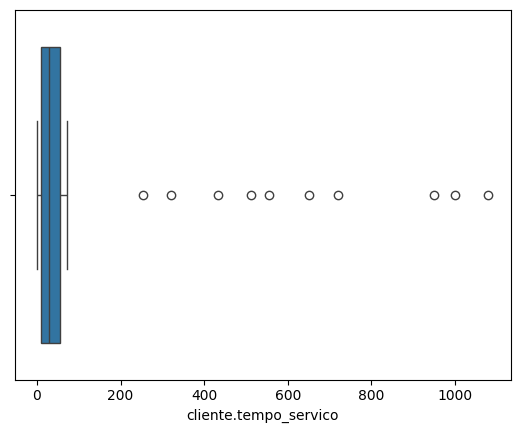

In [59]:
sns.boxplot(x=df_sem_nulos['cliente.tempo_servico'])

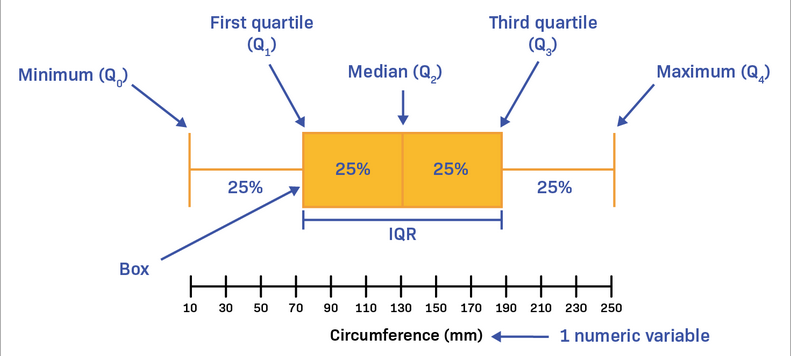

In [62]:
Q1 = df_sem_nulos['cliente.tempo_servico'].quantile(0.25) # Obter o 1º quartil
Q3 = df_sem_nulos['cliente.tempo_servico'].quantile(0.75) # Obter o 1º quartil
IQR = Q3 - Q1 # Intervalo Interquartil

limite_inferior = Q1 - 1.5 * Q1
limite_superior = Q3 + 1.5 * Q3


In [63]:
df_sem_nulos[(df_sem_nulos['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulos['cliente.tempo_servico'] > limite_superior)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1952,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.00
1953,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.00
1959,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.00
1963,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1965,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.30
1970,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.00
1973,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1977,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.40
1980,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.20
1981,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


## Substituindo valores para outliers
- Se manter, algorimo ML aprende com base em padrões incorretos e gera previsões inadequadas

In [89]:
df_sem_out = df_sem_nulos.copy()

In [90]:
indice_outliers = (df_sem_out['cliente.tempo_servico'] < limite_inferior) | (df_sem_out['cliente.tempo_servico'] > limite_superior)

df_sem_out[indice_outliers]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1952,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.00
1953,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.00
1959,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.00
1963,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1965,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.30
1970,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.00
1973,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1977,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.40
1980,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.20
1981,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


In [91]:
df_sem_out.loc[indice_outliers, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[indice_outliers, 'conta.cobranca.Total'] / df_sem_out.loc[indice_outliers, 'conta.cobranca.mensal'] 
)

<Axes: xlabel='cliente.tempo_servico'>

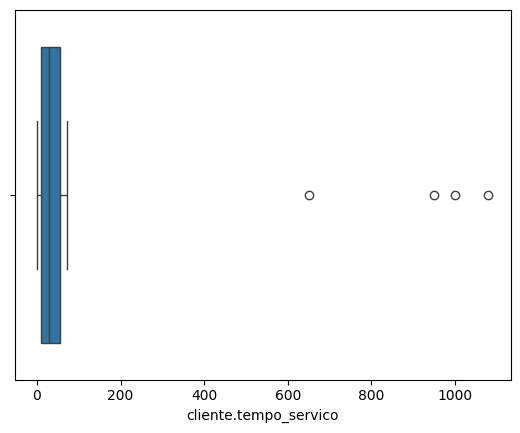

In [92]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [93]:
df_sem_out[indice_outliers][['cliente.tempo_servico', 'conta.cobranca.mensal' ,'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1952,1080.0,103.90,112212.00
1953,1000.0,45.90,45900.00
1959,951.0,84.10,79895.00
1963,2.0,46.05,80.35
1965,43.0,99.80,4259.30
1970,650.0,73.00,47450.00
1973,44.0,89.55,3856.75
1977,7.0,19.15,124.40
1980,4.0,89.20,346.20
1981,1.0,19.55,19.55


## Removendo Outliers

In [94]:
Q1 = df_sem_out['cliente.tempo_servico'].quantile(0.25) # Obter o 1º quartil
Q3 = df_sem_out['cliente.tempo_servico'].quantile(0.75) # Obter o 1º quartil
IQR = Q3 - Q1 # Intervalo Interquartil

limite_inferior = Q1 - 1.5 * Q1
limite_superior = Q3 + 1.5 * Q3

outlier_index = (df_sem_out['cliente.tempo_servico'] < limite_inferior) | (df_sem_out['cliente.tempo_servico'] > limite_superior)


In [95]:
df_sem_out[outlier_index]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1952,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.9,112212.0
1953,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.9,45900.0
1959,2834-SPCJV,sim,masculino,0,sim,nao,951.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.1,79895.0
1970,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.0,47450.0


In [96]:
df_sem_out = df_sem_out[~outlier_index] # o ~ significa obter todas sem as amostras que obtidas

df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [97]:
df_sem_out.reset_index(drop=True, inplace=True)

<Axes: xlabel='cliente.tempo_servico'>

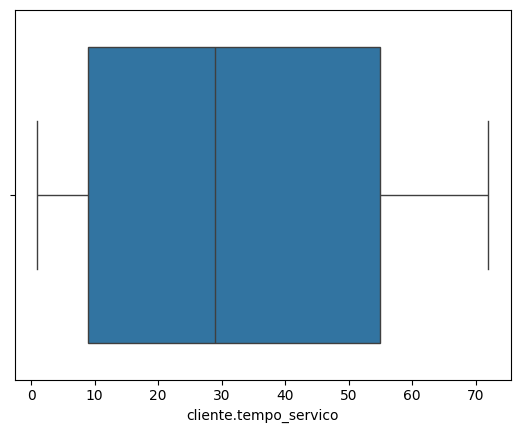

In [98]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

# Trabalhando com Variaveis Categoricas

In [99]:
df_sem_out


,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [100]:
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()

In [101]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [ ]:
# Criação do conjunto de mapeamento (somente para colunas categoricas binárias)
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [103]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-=' * 30)

Coluna: Churn
['nao' 'sim']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.genero
['masculino' 'feminino']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.idoso
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.parceiro
['nao' 'sim']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.dependentes
['nao' 'sim']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: telefone.servico_telefone
['sim' 'nao']
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: telefone.

In [106]:
# Selecionar as colunas que tem apenas não é sim para efetuar o mapeamento

colunas = ['Churn','cliente.parceiro', 'cliente.dependentes', 'telefone.servico_telefone', 'conta.faturamente_eletronico', 'cliente.genero']



In [107]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)

C:\Users\gerso\AppData\Local\Temp\ipykernel_3968\1936427263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)


In [108]:
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [109]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-=' * 30)

Coluna: Churn
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.genero
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.idoso
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.parceiro
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.dependentes
[0 1]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: telefone.servico_telefone
[1 0]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone

# Tratamento de Variaveis Categoricas não binárias

### One Hot Encoder (dummy)
- Exemplo abaixo

In [110]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [113]:
pd.get_dummies(s, dtype=int) # Aplicação da técnica OneHotEncode

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


# Aplicação do OneHotEncode
- Como descobrir as colunas para aplicar?

In [114]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7002 non-null   int64  
 1   cliente.genero                 7002 non-null   int64  
 2   cliente.idoso                  7002 non-null   int64  
 3   cliente.parceiro               7002 non-null   int64  
 4   cliente.dependentes            7002 non-null   int64  
 5   cliente.tempo_servico          7002 non-null   float64
 6   telefone.servico_telefone      7002 non-null   int64  
 7   telefone.varias_linhas         7002 non-null   object 
 8   internet.servico_internet      7002 non-null   object 
 9   internet.seguranca_online      7002 non-null   object 
 10  internet.backup_online         7002 non-null   object 
 11  internet.protecao_dispositivo  7002 non-null   object 
 12  internet.suporte_tecnico       7002 non-null   o

In [119]:
df_dummies = pd.get_dummies(df_sem_id, dtype=int).copy()
df_dummies.head()

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.9,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.9,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.0,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.9,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.4,571.45,...,0,0,1,0,1,0,1,0,0,0


In [120]:
df_dummies.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servico de internet',
     

In [121]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 

# Agora o modelo de dados esta pronto para ser aplicado num algoritmo de Machine Learning